## **VGG-16 Code Implementation**

The deep refers to the number of layers with VGG-16 or VGG-19 consisting of 16 and 19 convolutional layers.

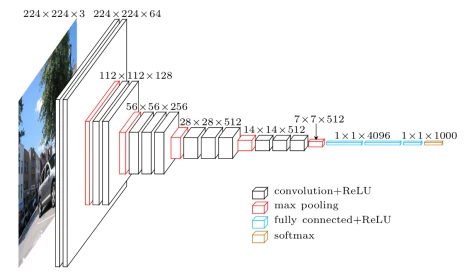

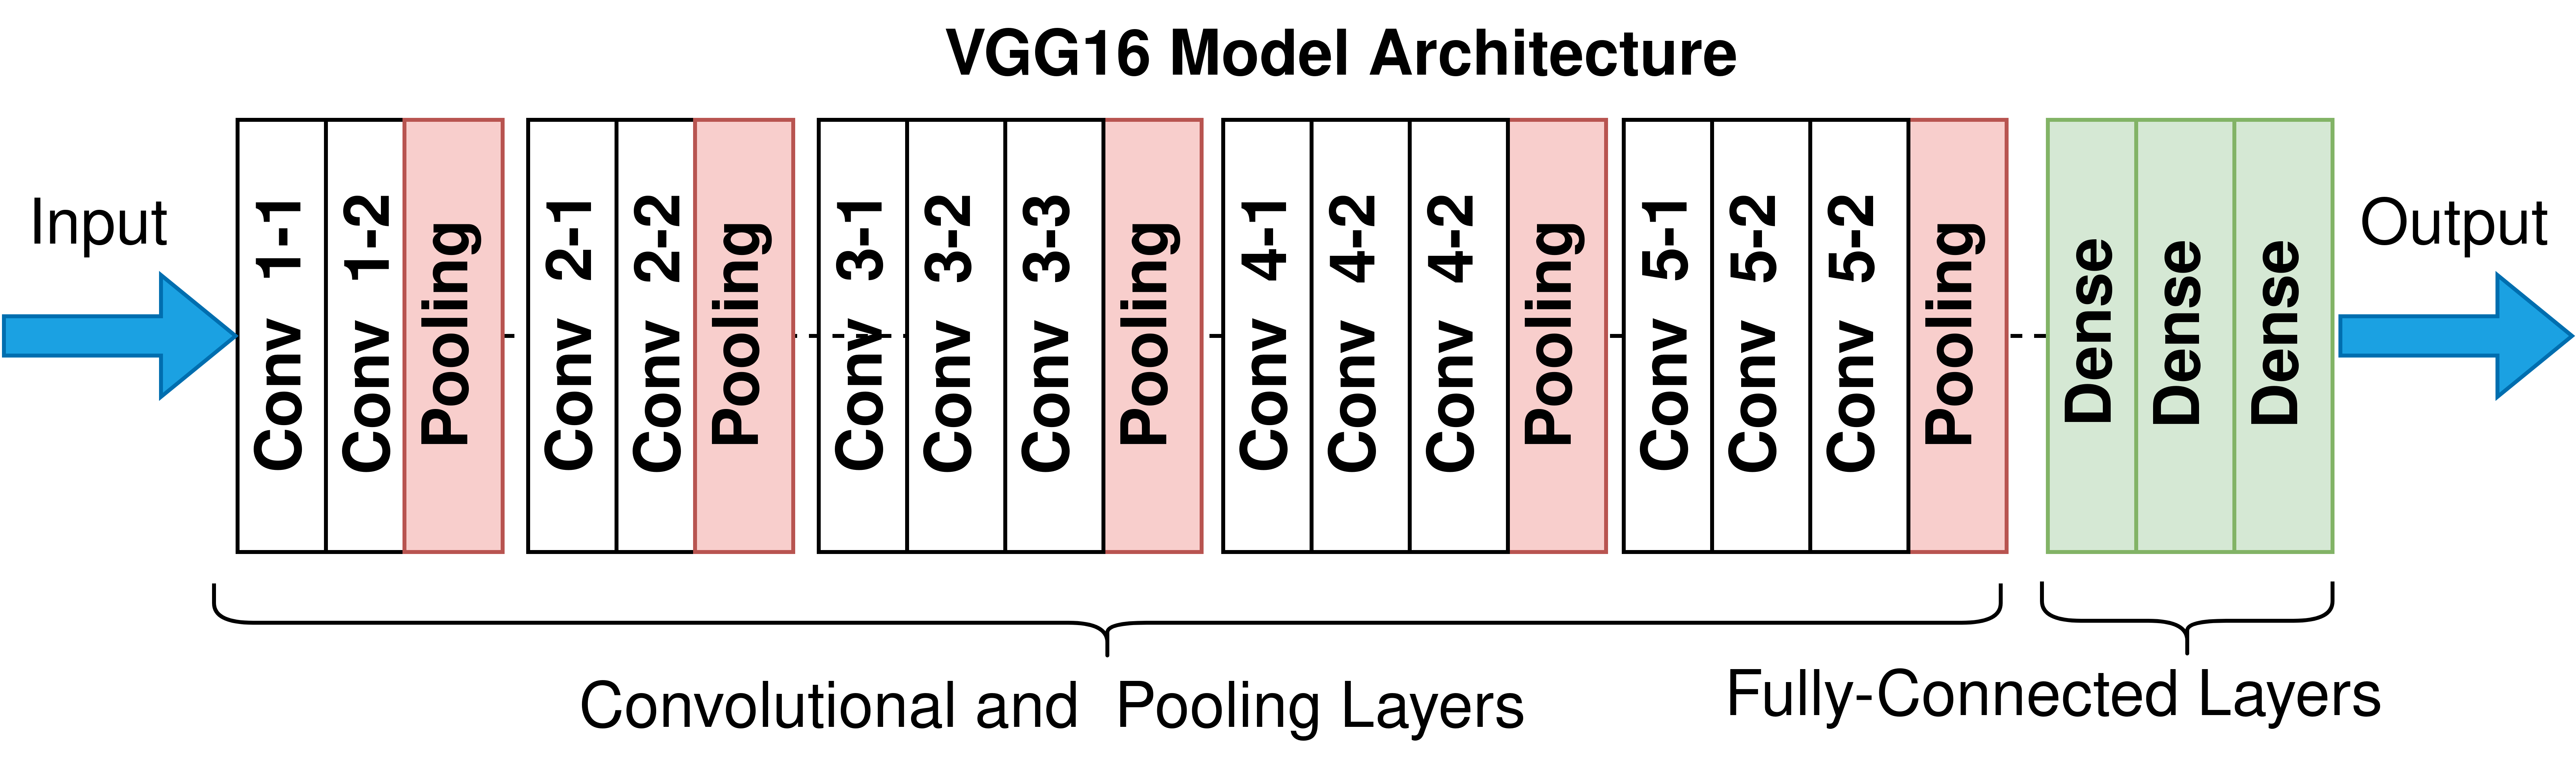

138 million parameters. Uniform architecture. 

There are few convolutional layers followed by a pooling layer that reduces the height and width. 64 filters are available and we can double the amount to 128, then to 256 filters. In the last layers we can use 512 filters.

##**Complexity and challenges**
The number of filters that we can use doubles on every step or through every stack of the convolution layer. This is a major principle used to design the architecture of the VGG16 network. One of the crucial downsides of the VGG16 network is that it is a huge network, which means that it takes more time to train its parameters.

Because of its depth and number of fully connected layers, the VGG16 model is more than 533MB. This makes implementing a VGG network a time-consuming task.

The VGG16 model is used in several deep learning image classification problems, but smaller network architectures such as GoogLeNet and SqueezeNet are often preferable. In any case, the VGGNet is a great building block for learning purposes as it is straightforward to implement

##**Performance of VGG Models**
VGG16 highly surpasses the previous versions of models in the ILSVRC-2012 and ILSVRC-2013 competitions. Moreover, the VGG16 result is competing for the classification task winner (GoogLeNet with 6.7% error) and considerably outperforms the ILSVRC-2013 winning submission Clarifai. It obtained 11.2% with external training data and around 11.7% without it. In terms of the single-net performance, the VGGNet-16 model achieves the best result with about 7.0% test error, thereby surpassing a single GoogLeNet by around 0.9%.

#Code Implementation Of VGG 16

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2022-12-30 09:09:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   160MB/s    in 0.4s    

2022-12-30 09:09:30 (160 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
! unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
import numpy as np

In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory='cats_and_dogs_filtered/train',target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory='cats_and_dogs_filtered/validation',target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
#Convolutional Layer

model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#Fully Connected Layer

model.add(Flatten())
model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [6]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint = ModelCheckpoint('vgg16.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',period=1)
early = EarlyStopping(monitor='val_acc',min_delta=0.1,patience=5,verbose=1,mode='auto')

H = model.fit_generator(steps_per_epoch=10,generator=traindata,validation_data=testdata,validation_steps=10,callbacks=[checkpoint,early])

<ipython-input-6-9110dfb35f4d>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(steps_per_epoch=10,generator=traindata,validation_data=testdata,validation_steps=10,callbacks=[checkpoint,early])


10/10 [==============================] - ETA: 0s - loss: 2782.0378 - accuracy: 0.4901
Epoch 1: val_accuracy improved from -inf to 0.52500, saving model to vgg16.hdf5


10/10 [==============================] - 31s 2s/step - loss: 2782.0378 - accuracy: 0.4901 - val_loss: 0.6916 - val_accuracy: 0.5250


1/1 [==============================] - 0s 123ms/step
dog


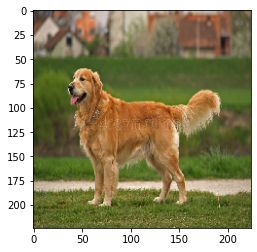

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img

# Load the image and resize it
img = load_img('dog.jpeg', target_size=(224, 224))

# Convert the image to a NumPy array
img = np.asarray(img)

# Plot the image
plt.imshow(img)

# Add an extra dimension to the image to make it compatible with the model's input shape
img = np.expand_dims(img, axis=0)

# Load the model
from keras.models import load_model
saved_model = load_model('vgg16.hdf5')

# Make a prediction with the model
output = saved_model.predict(img)

# Print the prediction
if output[0][0] < output[0][1]:
  print('dog')
else:
  print('cat')

In [32]:
if os.path.exists('dog.jpeg'):
    print("The file 'dog.jpeg' exists in the current directory.")
else:
    print("The file 'dog.jpeg' does not exist in the current directory.")

The file 'dog.jpeg' does not exist in the current directory.


In [14]:
output

array([[0.48386073, 0.51613927]], dtype=float32)

In [27]:
! zipinfo cats_and_dogs_filtered.zip


Archive:  cats_and_dogs_filtered.zip
Zip file size: 68606236 bytes, number of entries: 3008
drwxr-x---  3.0 unx        0 bx stor 16-Sep-23 21:19 cats_and_dogs_filtered/
-rw-r-----  3.0 unx      140 tx defN 16-Sep-22 19:01 cats_and_dogs_filtered/vectorize.py
drwxr-x---  3.0 unx        0 bx stor 16-Sep-22 18:45 cats_and_dogs_filtered/validation/
drwxr-x---  3.0 unx        0 bx stor 16-Sep-22 18:23 cats_and_dogs_filtered/train/
drwxr-x---  3.0 unx        0 bx stor 16-Sep-22 18:45 cats_and_dogs_filtered/validation/dogs/
-rw-r--r--  3.0 unx    28484 bx defN 13-Sep-20 17:00 cats_and_dogs_filtered/validation/dogs/dog.2127.jpg
-rw-r--r--  3.0 unx    27922 bx defN 13-Sep-20 17:00 cats_and_dogs_filtered/validation/dogs/dog.2126.jpg
-rw-r--r--  3.0 unx    45328 bx defN 13-Sep-20 17:00 cats_and_dogs_filtered/validation/dogs/dog.2125.jpg
-rw-r--r--  3.0 unx    24140 bx defN 13-Sep-20 17:00 cats_and_dogs_filtered/validation/dogs/dog.2124.jpg
-rw-r--r--  3.0 unx     7858 bx defN 13-Sep-20 17:00 cats_